In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

##### this notebook deal with the salinity data from 

https://podaac.jpl.nasa.gov/dataset/SMAP_RSS_L3_SSS_SMI_MONTHLY_V2?ids=TemporalResolution:Measurement:Variable:DataFormat&values=Monthly:Salinity/Density:Salinity:NETCDF 

plot the salinity for each month in 2014 to 2015 

###### trying to generate a gif file 

In [2]:
nc1=Dataset('sss_rc201109.v5.0cap.nc')
# nc1.set_auto_mask(False)

In [3]:
nc1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    title: Aquarius CAP 1x1 Deg Gridded Averaged Maps
    history: DATA_SOURCE_VERSION 5.0.cap
    institution: JPL
    processing_level: 3
    cdm_data_type: Grid
    date_issued: 2018-06-26T05:53:18Z
    date_created: 2018-06-26T05:53:18Z
    time_coverage_start: 09-2011
    time_coverage_end: 09-2011
    geospatial_lat_max: 90.0
    geospatial_lat_min: -90.0
    geospatial_lon_max: 180.0
    geospatial_lon_min: -180.0
    geospatial_lat_resolution: 1.0
    geospatial_lon_resolution: 1.0
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
    platform: Aquarius/SAC-D
    sensor: Aquarius
    project: Aquarius
    product_version: 5.0.cap
    keywords_vocabulary: http://gcmd.gsfc.nasa.gov/Resources/valids/gcmd_parameters.html
    keywords: SURFACE SALINITY, SALINITY, AQUARIUS, Jet Propulsion Laboratory, NASA, http://aquarius.nasa.gov/, AQU

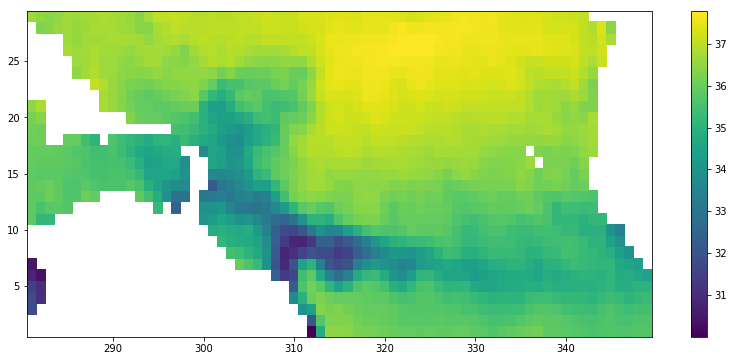

In [42]:
lat=nc1.variables["lat"][90:120]
lon=nc1.variables["lon"][280:350]
sss=nc1.variables['sss_cap'][90:120,280:350]
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
X,Y = np.meshgrid(lon, lat)
p = ax.pcolor(X, Y, sss, vmin=10, vmax=100,cmap=cm.RdBu)
cb = fig.colorbar(p)

In [40]:
# read multiple files
import os
path0="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3"
files=os.listdir(path0)
files2=files[:]

def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files:
    if not hasNumber(file) or not file.startswith('RSS_smap_SSS_monthly_'):
        files2.remove(file)         # remove all the items has no digit 
files=files2
len(files)

13

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


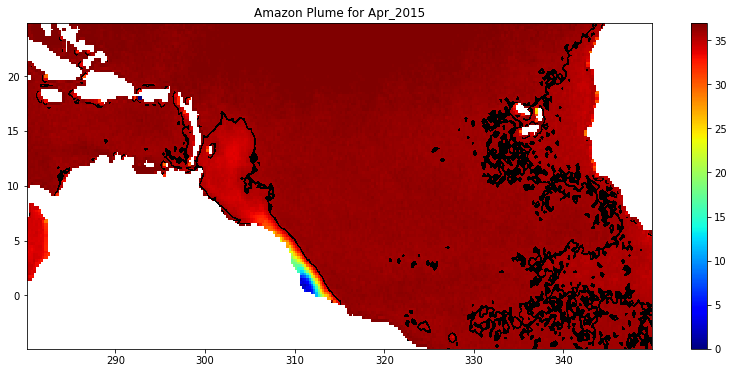

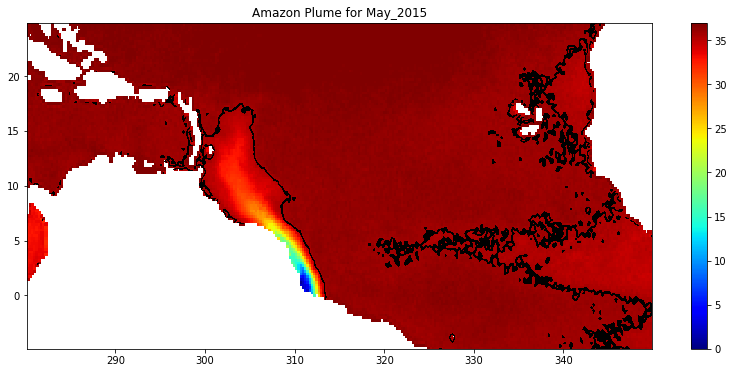

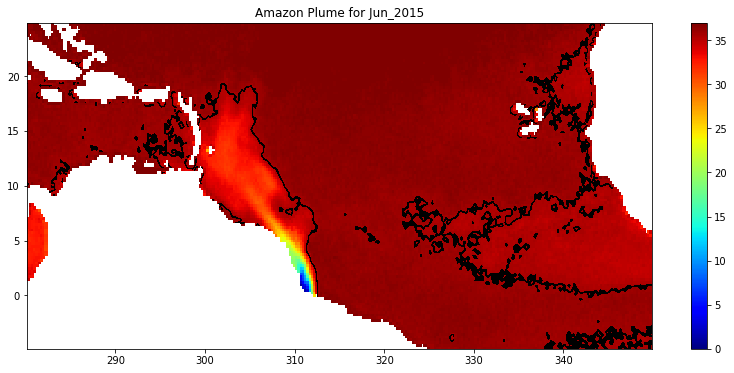

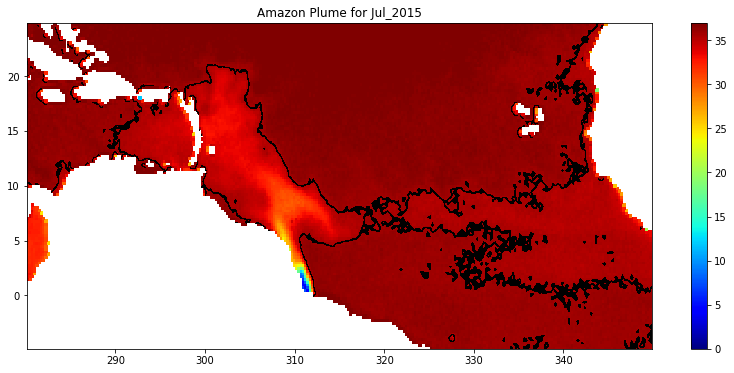

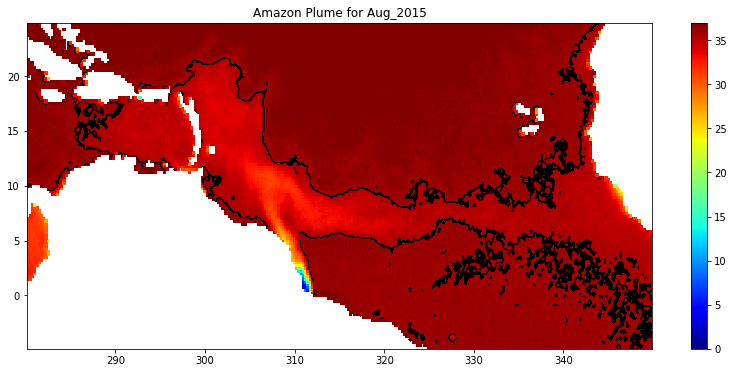

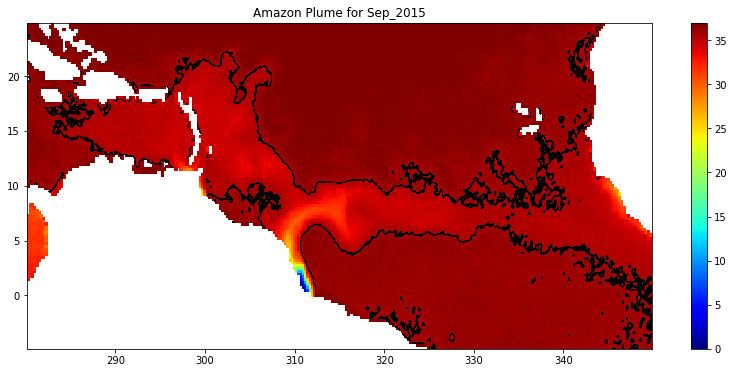

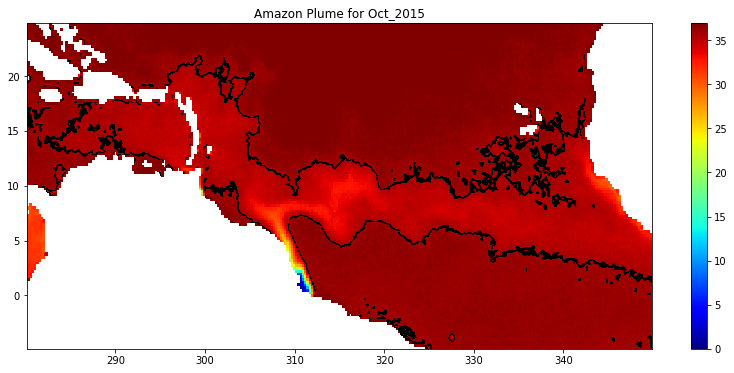

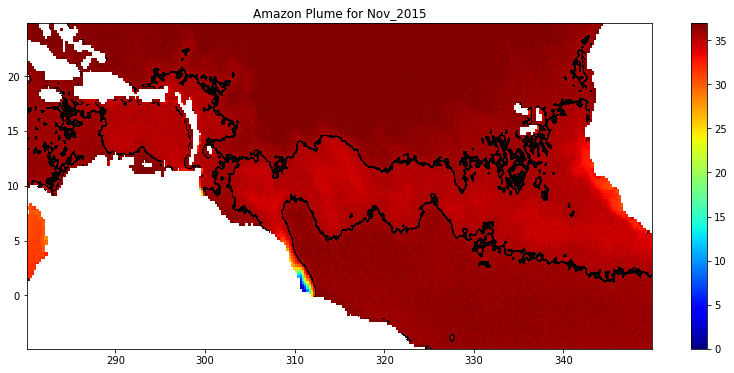

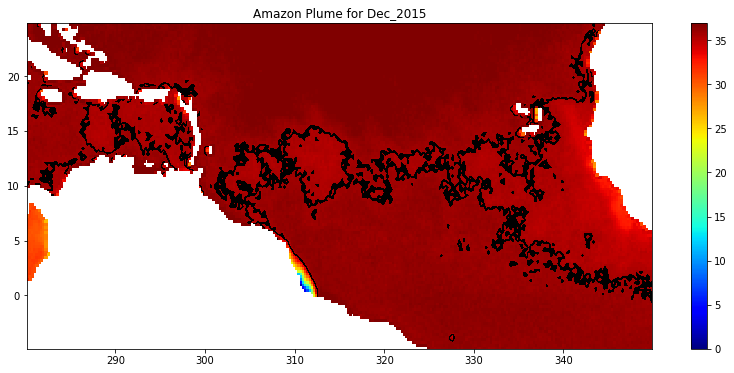

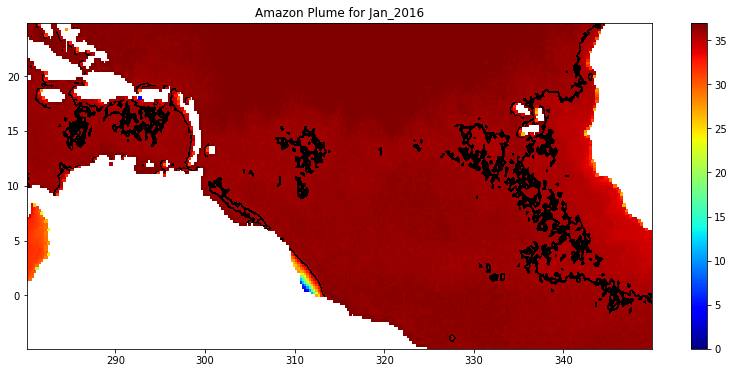

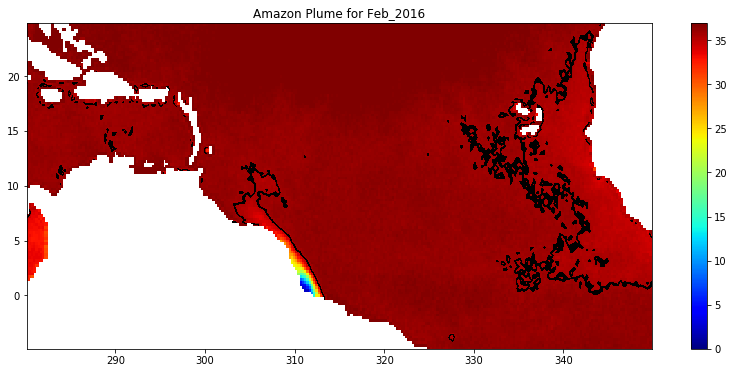

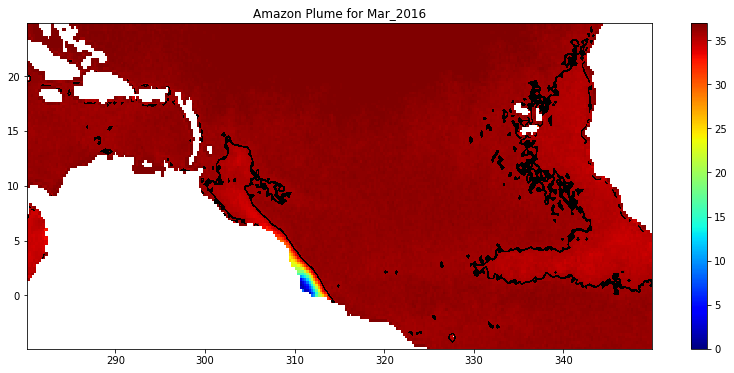

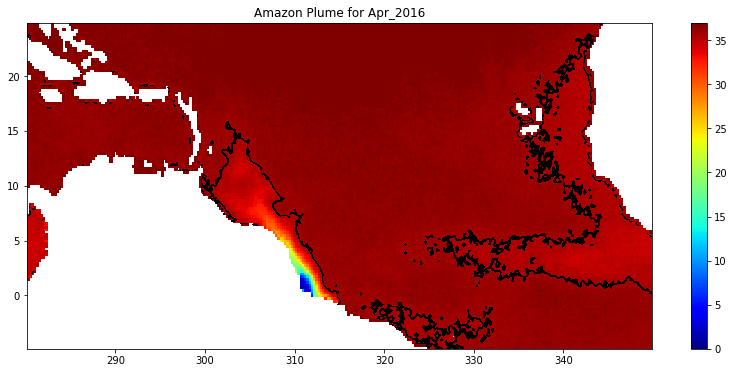

In [43]:
month_name=["Apr_2015","May_2015","Jun_2015","Jul_2015","Aug_2015","Sep_2015","Oct_2015","Nov_2015","Dec_2015","Jan_2016","Feb_2016","Mar_2016","Apr_2016"]
file_name=["201504","201505","201506","201507","201508","201509","201510","201511","201512","201601","201602","201603","201604"]
path="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/"
lat_min=340 
lat_max=460 
lon_min=1120 
lon_max=1400

for i in range(len(month_name)):
    nc2=Dataset(files[i])
    nc2.set_auto_mask(False)
#     surtep=nc2.variables['surtep']
    sss_smap=nc2.variables['sss_smap']  #SMAP sea surface salinity
#     sss_ref=nc2.variables['sss_ref']  #Reference sea surface salinity from HYCOM

    lat=nc2.variables["lat"][:]
    lon=nc2.variables["lon"][:]

    # lat_min=np.where(lat>-5)[0][0]
    # lat_max=np.where(lat>25)[0][0]
    # lon_min=np.where(lon>280)[0][0]
    # lon_max=np.where(lon>350)[0][0]

    sss=nc2.variables['sss_smap'][lat_min:lat_max,lon_min:lon_max]
    lat1=lat[lat_min:lat_max]
    lon1=lon[lon_min:lon_max]

    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(1, 1, 1)
    X,Y = np.meshgrid(lon1, lat1)
    sss[np.where(sss<0)]=np.nan
    p = ax.pcolor(X, Y, sss, vmin=0, vmax=37,cmap=cm.jet)
    
    
    cb = fig.colorbar(p)
    cf = ax.contourf(X,Y, np.round(sss,1), levels=[35.7,35.8], colors = 'k', linewidths=[0.1,0.1])
    ax.set_title('Amazon Plume for '+ month_name[i])
    fig.savefig(path+file_name[i]+'.png')

['/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Apr_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Apr_2016.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Aug_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Dec_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Feb_2016.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Jan_2016.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Jul_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Jun_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/May_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Nov_2015.png',
 '/Network/Servers/csrp.tamu.e

['/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/.DS_Store',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Apr_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Apr_2016.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Aug_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Dec_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Feb_2016.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Jan_2016.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Jul_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/Jun_2015.png',
 '/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/gif/May_2015.png',
 '/Network/Servers/csrp.tamu.edu/

In [71]:
hasNumber('.DS_Store')
a=[1,2,3]
# if hasNumber('.DS_Store')==True:
#     print('go')
if not hasNumber('aaa'):
    a.remove(3)
a

[1, 2]

In [82]:
import imageio
import os
import os.path
def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D

def create_gif(gif_name, path, duration):
    '''
    生成gif文件，原始图片仅支持png格式
    gif_name ： 字符串，所生成的 gif 文件名，带 .gif 后缀
    path :      需要合成为 gif 的图片所在路径
    duration :  gif 图像时间间隔
    '''

    frames = []
    pngFiles = os.listdir(path)
    files = [os.path.join(path, f) for f in pngFiles]
    files2=files
    for file in files:
        if not hasNumber(file):
            files2.remove(file)         # remove all the items has no digit 
    for image_name in files2:
        # 读取 png 图像文件
        frames.append(imageio.imread(image_name))
    # 保存为 gif 
    imageio.mimsave(path+gif_name, frames, 'GIF', duration = duration)
    return

def main():
    gif_name = 'created_gif.gif'
    path = './gif/'   #指定文件路径，注意不要有数字
    duration = 0.5
    create_gif(gif_name, path, 1)

if __name__ == "__main__":
    main()


/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


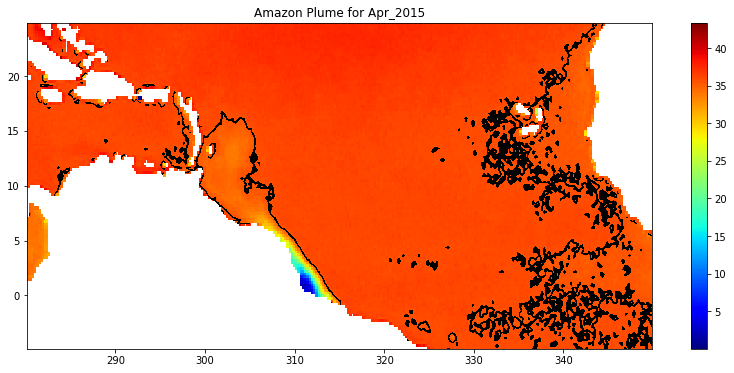

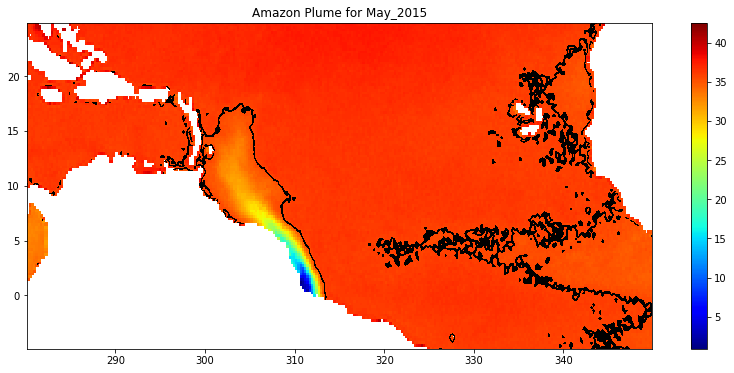

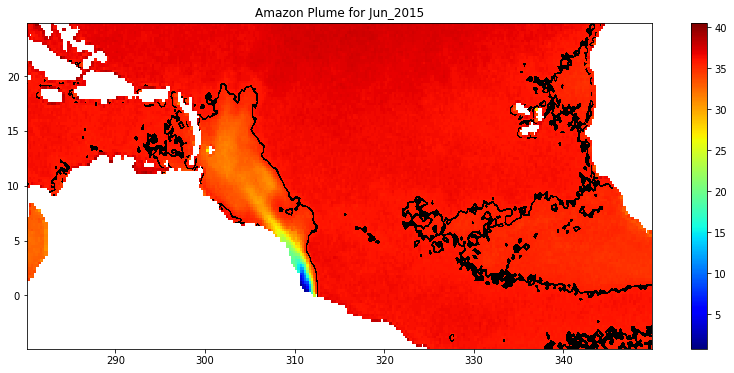

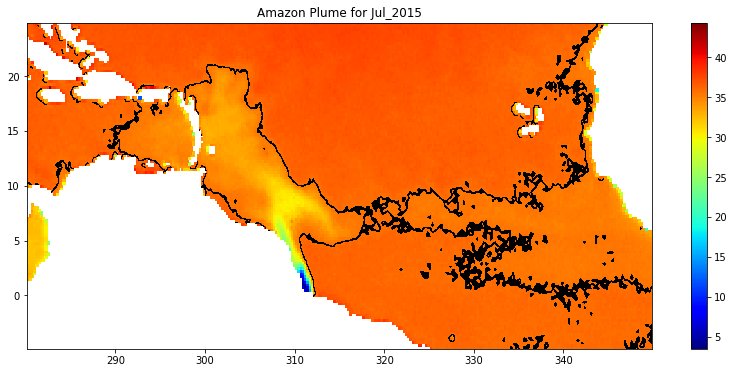

In [202]:
for i in range(len(month_name)):
    nc2=Dataset(files[i])
    nc2.set_auto_mask(False)
#     surtep=nc2.variables['surtep']
    sss_smap=nc2.variables['surtep']  #SMAP sea surface salinity
#     sss_ref=nc2.variables['sss_ref']  #Reference sea surface salinity from HYCOM

    lat=nc2.variables["lat"][:]
    lon=nc2.variables["lon"][:]

    # lat_min=np.where(lat>-5)[0][0]
    # lat_max=np.where(lat>25)[0][0]
    # lon_min=np.where(lon>280)[0][0]
    # lon_max=np.where(lon>350)[0][0]

    sss=nc2.variables['surtep'][lat_min:lat_max,lon_min:lon_max]
    lat1=lat[lat_min:lat_max]
    lon1=lon[lon_min:lon_max]

    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(1, 1, 1)
    X,Y = np.meshgrid(lon1, lat1)
    sss[np.where(sss<0)]=np.nan
    p = ax.pcolor(X, Y, sss,cmap=cm.jet)
    cb = fig.colorbar(p)
    cf = ax.contourf(X,Y, np.round(sss,1), levels=[35.7,35.8], colors = 'k', linewidths=[0.1,0.1])
    ax.set_title('Amazon Plume for '+ month_name[i])
    fig.savefig(month_name[i]+'.png')

In [205]:
from matplotlib import animation
from pylab import *
# solve the ode problem of the double compound pendulum again

from scipy.integrate import odeint
g = 9.82; L = 0.5; m = 0.1
pi=3.14
def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [pi/2, pi/2, 0, 0]  # initial state
t = linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

In [211]:
shape(x)
shape(t)
shape(x0)

(4,)

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)
def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])
